In [1]:
import tensorflow as tf

In [2]:
print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 2.0.0-alpha0


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 使用data函数进行处理数据
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

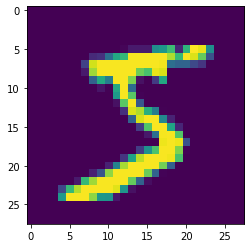

In [8]:
plt.imshow(train_images[0])

In [9]:
train_images = train_images/255
test_images = test_images/255

In [10]:
dataset_images = tf.data.Dataset.from_tensor_slices(train_images)

In [11]:
dataset_images

<TensorSliceDataset shapes: (28, 28), types: tf.float64>

In [12]:
dataset_labels = tf.data.Dataset.from_tensor_slices(train_labels)

In [13]:
dataset_labels

<TensorSliceDataset shapes: (), types: tf.uint8>

In [14]:
dataset = tf.data.Dataset.zip((dataset_images, dataset_labels))

In [15]:
dataset

<ZipDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

In [21]:
batch_size = 256

In [16]:
dataset = dataset.shuffle(train_images.shape[0]).repeat().batch(batch_size)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
steps_per_epoch = train_images.shape[0]/batch_size

In [23]:
model.fit(dataset, epochs=5, steps_per_epoch=steps_per_epoch)

Epoch 1/5
235/234 [==============================] - 1s 6ms/step - loss: 0.4398 - accuracy: 0.8820
Epoch 2/5
235/234 [==============================] - 1s 5ms/step - loss: 0.1984 - accuracy: 0.9438
Epoch 3/5
235/234 [==============================] - 1s 4ms/step - loss: 0.1468 - accuracy: 0.9592
Epoch 4/5
235/234 [==============================] - 1s 4ms/step - loss: 0.1167 - accuracy: 0.9670
Epoch 5/5
235/234 [==============================] - 1s 4ms/step - loss: 0.0976 - accuracy: 0.9720
